# **Ayudantía 8 - Interpolación**
## Etienne Rojas

Ante cualquier duda o posible corrección, por favor mandar un correo a `etienne.rojas@sansano.usm.cl` 

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Interpolación Baricéntrica

La interpolación baricéntrica es una forma eficiente y estable de calcular el polinomio de interpolación P(x):

Dado un conjunto de puntos $x_0, x_1, \ldots, x_n$ y sus valores correspondientes $y_0, y_1, \ldots, y_n$, el polinomio interpolante se expresa como:

$$
P(x) = \frac{\displaystyle\sum_{j=0}^{n} \frac{w_j}{x - x_j} y_j}{\displaystyle\sum_{j=0}^{n} \frac{w_j}{x - x_j}}
$$

donde los **pesos** $w_j$ son precomputados como:

$$
w_j = \frac{1}{\prod_{\substack{k=0 \\ k \ne j}}^{n} (x_j - x_k)}
$$

Esta forma evita tener que calcular explícitamente los polinomios de Lagrange y mejora la estabilidad numérica.


# **EJRCICIO 1**

Trabajas como investigador en un laboratorio que anliza señales del espacio y crees haber encontrado una señal de un evento astronomico muy importantes, pero lamentablemente parte de la señal se daño y ahora solo cuentas con información parcial para recuperar la señal original.

In [2]:
# PARÁMETROS GENREALES
a, b = -1, 1                      # Intervalo de interpolación
N_func = 1000                    # Número de puntos para graficar la función original
N_interp = 20                    # Número de puntos para la interpolación
N_eval = 1000                    # Número de puntos para evaluar y comparar la interpolación

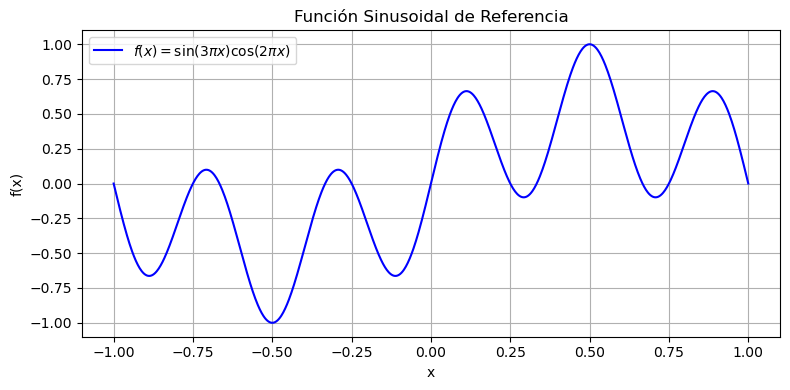

In [3]:
f = lambda x: np.sin(3 * np.pi * x) * np.cos(2 * np.pi * x)

x_func = np.linspace(a, b, N_func)
y_func = f(x_func) 

plt.figure(figsize=(8, 4))
plt.plot(x_func, y_func, label=r'$f(x) = \sin(3\pi x)\cos(2\pi x)$', color='blue')
plt.title("Función Sinusoidal de Referencia")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
def barycentric_weights(x_nodes):
    """
    Calcula los pesos para los nodos dados.
    """
    n = len(x_nodes)
    w = np.ones(n)
    for j in range(n):
        for k in range(n):
            if j != k:
                w[j] /= (x_nodes[j] - x_nodes[k])
    return w

def barycentric_interpolator(x_nodes, y_nodes):
    """
    Devuelve una función que evalúa la interpolación baricéntrica
    en cualquier conjunto de puntos x_eval.
    """
    w = barycentric_weights(x_nodes)

    def interp(x_eval):
        x_eval = np.asarray(x_eval)
        numer = np.zeros_like(x_eval, dtype=float)
        denom = np.zeros_like(x_eval, dtype=float)
        exact = np.zeros_like(x_eval, dtype=bool)

        for j in range(len(x_nodes)):
            x_diff = x_eval - x_nodes[j]
            temp = w[j] / x_diff
            numer += temp * y_nodes[j]
            denom += temp
            exact |= (x_diff == 0)

        result = numer / denom
        result[exact] = y_nodes[np.where(exact)[0]]
        return result

    return interp


Utilice sus funciones de interpolación para crear el polinomio de interpolación

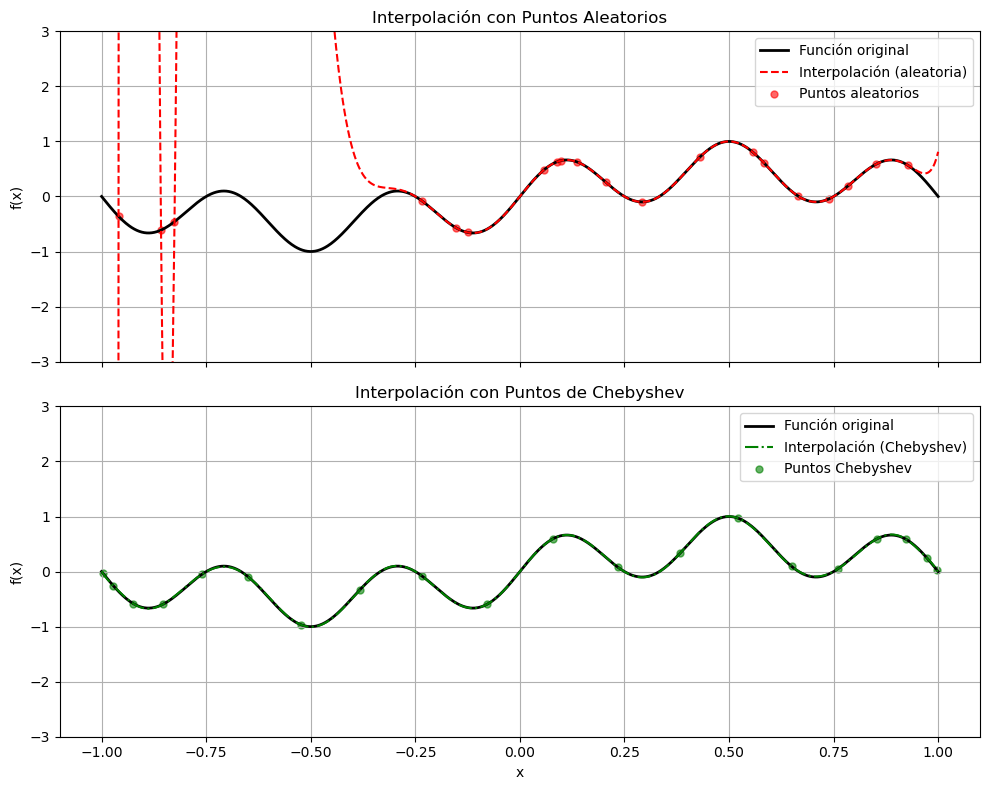

In [9]:
x_eval = np.linspace(a, b, N_eval)

# random
np.random.seed(0)
x_rand = np.sort(np.random.uniform(a, b, N_interp))
y_rand = f(x_rand)
px_rand = barycentric_interpolator(x_rand, y_rand)
py_rand = px_rand(x_eval)

# Chebyshev
x_cheb = np.cos(np.pi * (2 * np.arange(1, N_interp + 1) - 1) / (2 * N_interp))
x_cheb = 0.5 * (b - a) * x_cheb + 0.5 * (b + a) 
y_cheb = f(x_cheb)
px_cheb = barycentric_interpolator(x_cheb, y_cheb)
py_cheb = px_cheb(x_eval)


fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

axs[0].plot(x_eval, y_func, 'k-', label="Función original", linewidth=2)
axs[0].plot(x_eval, py_rand, 'r--', label="Interpolación (aleatoria)")
axs[0].scatter(x_rand, y_rand, color='red', s=25, label="Puntos aleatorios", alpha=0.6)
axs[0].set_title("Interpolación con Puntos Aleatorios")
axs[0].set_ylabel("f(x)")
axs[0].legend()
axs[0].grid(True)
axs[0].set_ylim(-3, 3)

axs[1].plot(x_eval, y_func, 'k-', label="Función original", linewidth=2)
axs[1].plot(x_eval, py_cheb, 'g-.', label="Interpolación (Chebyshev)")
axs[1].scatter(x_cheb, y_cheb, color='green', s=25, label="Puntos Chebyshev", alpha=0.6)
axs[1].set_title("Interpolación con Puntos de Chebyshev")
axs[1].set_xlabel("x")
axs[1].set_ylabel("f(x)")
axs[1].legend()
axs[1].grid(True)
axs[1].set_ylim(-3, 3)

plt.tight_layout()
plt.show()

--- 

# **EJERCICIO 2 Versión Dificil**

Tú cliente, lamentablemente, ha sufrido la pérdida parcial de datos importantes. Su pendrive, que contenía las imágenes más preciadas de su mascota, se ha dañado. Después de varios intentos de recuperación, solo logró obtener una pequeña parte de las imágenes originales, que quedó incompleta y distorsionada. Tu tarea es ayudar a restaurar esas imágenes, utilizando técnicas de interpolación para reconstruir las originales a partir de la información recuperada.

El Cliente solo tiene backup de 1 de las imágenes, así que tiene que utilizar esa imagen para minimizar el error y luego se aplicará la misma técnica que diseñes al resto del dataset.

# **Foto Original**

In [10]:
# PARAMETROS
img = mpimg.imread('../Assets/greyhound2.PNG')
keep_fraction = 0.45

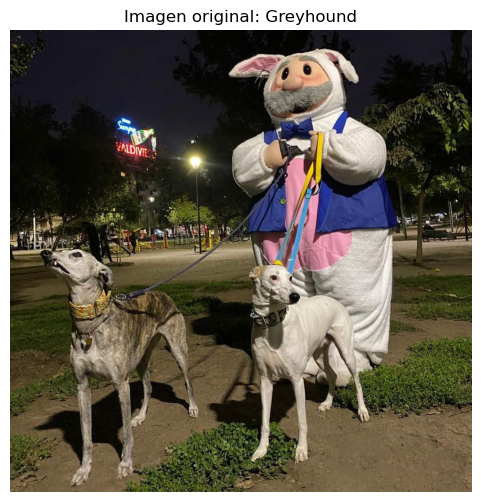

In [11]:
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title("Imagen original: Greyhound")
plt.show()


---

# **Foto Dañada**

In [12]:
H, W, C = img.shape
num_keep = int(keep_fraction * W)


i = np.arange(1, num_keep + 1)
cheb_norm = 0.5 * (1 - np.cos((2 * i - 1) / (2 * num_keep) * np.pi))
cheb_cols = np.clip((cheb_norm * (W - 1)).astype(int), 0, W - 1)
cheb_cols = np.unique(cheb_cols)

damaged_cheb = np.zeros_like(img)
for c in range(C):
    damaged_cheb[:, cheb_cols, c] = img[:, cheb_cols, c]

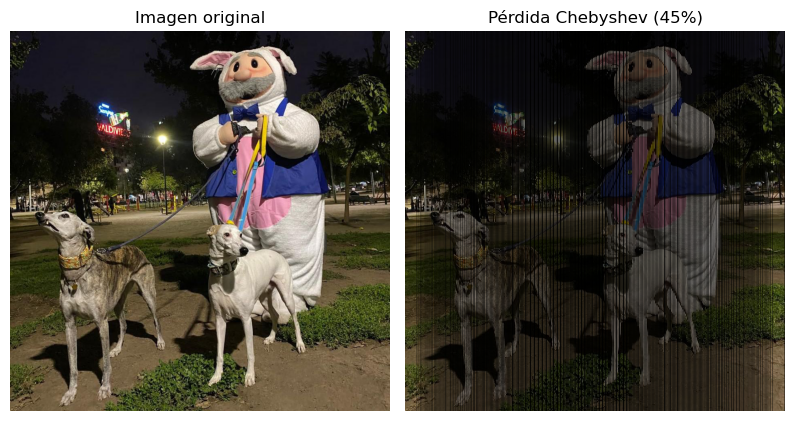

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(damaged_cheb)
plt.title(f"Pérdida Chebyshev ({keep_fraction*100:.0f}%)")
plt.axis('off')

plt.tight_layout()
plt.show()

---

# **Foto Restaurada**

In [ ]:
def barycentric_weights(x_nodes):
    """
    Calcula los pesos para los nodos dados.
    """
    n = len(x_nodes)
    w = np.ones(n)
    for j in range(n):
        for k in range(n):
            if j != k:
                w[j] /= (x_nodes[j] - x_nodes[k])
    return w

def barycentric_interpolator(x_nodes, y_nodes):
    """
    Devuelve una función que evalúa la interpolación baricéntrica
    en cualquier conjunto de puntos x_eval.
    """
    w = barycentric_weights(x_nodes)

    def interp(x_eval):
        x_eval = np.asarray(x_eval)
        numer = np.zeros_like(x_eval, dtype=float)
        denom = np.zeros_like(x_eval, dtype=float)
        result = np.zeros_like(x_eval, dtype=float)

        for j in range(len(x_nodes)):
            x_diff = x_eval - x_nodes[j]
            mask = x_diff == 0


            result[mask] = y_nodes[j]


            temp = np.zeros_like(x_eval)
            temp[~mask] = w[j] / x_diff[~mask]
            numer += temp * y_nodes[j]
            denom += temp

        # Solo usar el cociente donde no hubo coincidencias exactas
        non_exact = denom != 0
        result[non_exact] = numer[non_exact] / denom[non_exact]

        return result

    return interp



In [ ]:
def error_cuadratico_medio(y_real, y_reconstruida):
    return np.mean((y_real - y_reconstruida) ** 2)

In [ ]:
# --- Reconstrucción baricéntrica por filas ---
reconstructed = np.copy(damaged_cheb)

for row in range(H):
    # Para cada canal R, G, B
    for c in range(C):
        # Obtener los valores disponibles en columnas Chebyshev
        x_nodes = cheb_cols
        y_nodes = img[row, cheb_cols, c]

        # Si no hay suficientes puntos, saltar (seguridad)
        if len(x_nodes) < 2:
            continue

        # Construir interpolador
        interp = barycentric_interpolator(x_nodes, y_nodes)

        # Evaluar en todas las columnas
        x_all = np.arange(W)
        y_interp = interp(x_all)

        # Insertar la fila reconstruida en el canal correspondiente
        reconstructed[row, :, c] = y_interp


KeyboardInterrupt: 

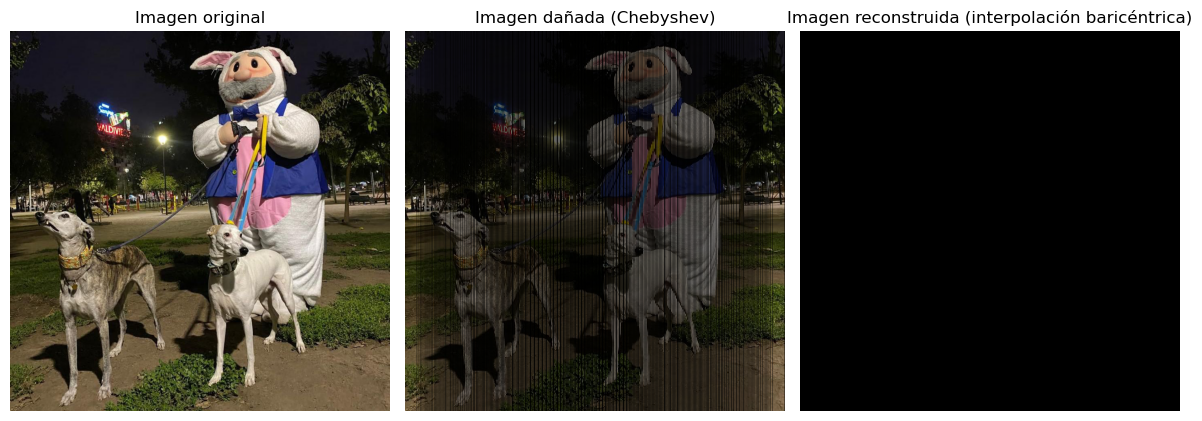

In [ ]:
# --- Mostrar imágenes ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(damaged_cheb)
plt.title("Imagen dañada (Chebyshev)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(np.clip(reconstructed, 0, 255).astype(np.uint8))
plt.title("Imagen reconstruida (interpolación baricéntrica)")
plt.axis('off')

plt.tight_layout()
plt.show()


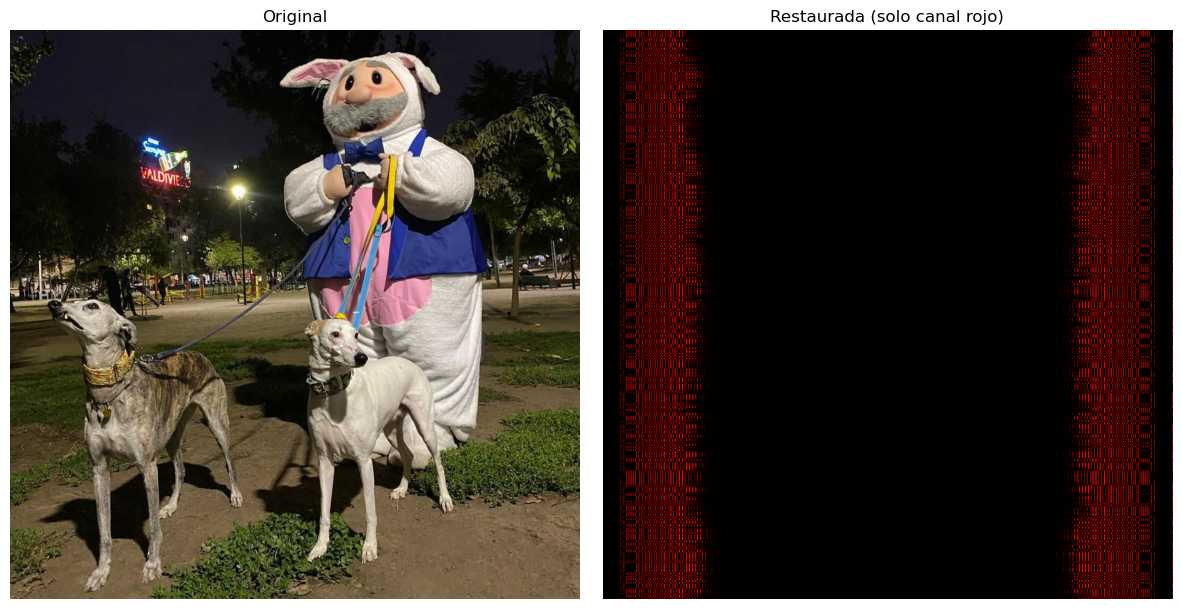

In [ ]:
from scipy.interpolate import BarycentricInterpolator

reconstructed_scipy = np.zeros_like(img, dtype=float)

for row in range(H):
    x_nodes = cheb_cols
    y_nodes = img[row, cheb_cols, 0]

    if len(x_nodes) < 2:
        continue

    interp = BarycentricInterpolator(x_nodes, y_nodes)
    x_all = np.arange(W)
    reconstructed_scipy[row, :, 0] = interp(x_all)


reconstructed_scipy_clipped = np.clip(reconstructed_scipy, 0, 255).astype(np.uint8)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_scipy_clipped)
plt.title("Restaurada (solo canal rojo)")
plt.axis('off')

plt.tight_layout()
plt.show()
